# Raspberry Pi GPIO

In this lab we are going to introduce the GPIO interface of the Raspberry Pi.

## What is a GPIO?

In one corner of the Raspberry Pi is a 40-pin expansion header.  The pins are numbered from 1 to 40, with the even numbers on the outside edge of the board as shown below.

<center>
    <figure align="center">
        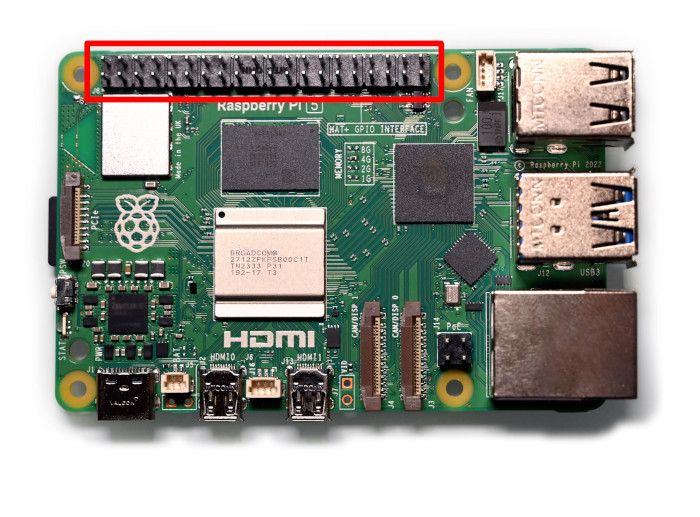
        <figcaption>
            Raspberry Pi 5 — <a href="https://commons.wikimedia.org/wiki/File:Raspberry_Pi_5.jpg">By SimonWaldherr, [CC BY 4.0], via Wikimedia Commons</a>
        </figcaption>
    </figure>
</center>

Each of these GPIO pins are identified below.

<center>
    <figure align="center">
        <img src="https://community.element14.com/resized-image/__size/1040x796/__key/telligent-evolution-components-attachments/13-153-00-00-00-01-71-99/GPIO.png" width="500">
        <figcaption>
            Raspberry Pi B+ GPIO 40 Pin Block Pinout — <a href="http://www.element14.com/community/docs/DOC-68203/l/raspberry-pi-b-gpio-40-pin-block-pinout">Christopher Stanton, Element 14 Community</a>
        </figcaption>
    </figure>
</center>

There are several different types of pins in the expansion header.

**Light Red**
> Connected to the Pi's 5V rail, provides a consistent +5.0V.

**Dark Red**
> Connected to the Pi's 3.3V rail, provides a consistent +3.3V.

**Black**
> Connected to the Pi's ground, provides a consistent 0V.

**Yellow**
> I<sup>2</sup>C bus dedicated to expansion boards


All the remaining pins are known as the **General-purpose input/output (GPIO)**.  The GPIO is a generic pin on a circuit whose behaviour, including whether it is an input or output, may be controlled by the user at run-time.

The GPIO pins are connected to the +3.3V rails.  When used for input they are able to read voltages.  When used for output they may be set to +3.3V (high) or 0V (low).

There are 4 different types of GPIO pins on the Raspberry Pi.  Of these, three may be used as GPIO or special purposes.

**Green**
> These are generic GPIO pins without a special purpose.

**Blue**
> These pins may operate as GPIO or used as an I<sup>2</sup>C bus.

**Orange**
> These pins may operate as GPIO or used for <abbr title="Universal asynchronous receiver/transmitter">UART</abbr>.

**Purple**
> These pins may operate as GPIO or used as an <abbr title="Serial Peripheral Interface">SPI</abbr> bus.

In total there are 24 GPIO ports.  Although any GPIO pins may be used, when possible the green pins should be used first.

# What is a Breadboard?

<center>
    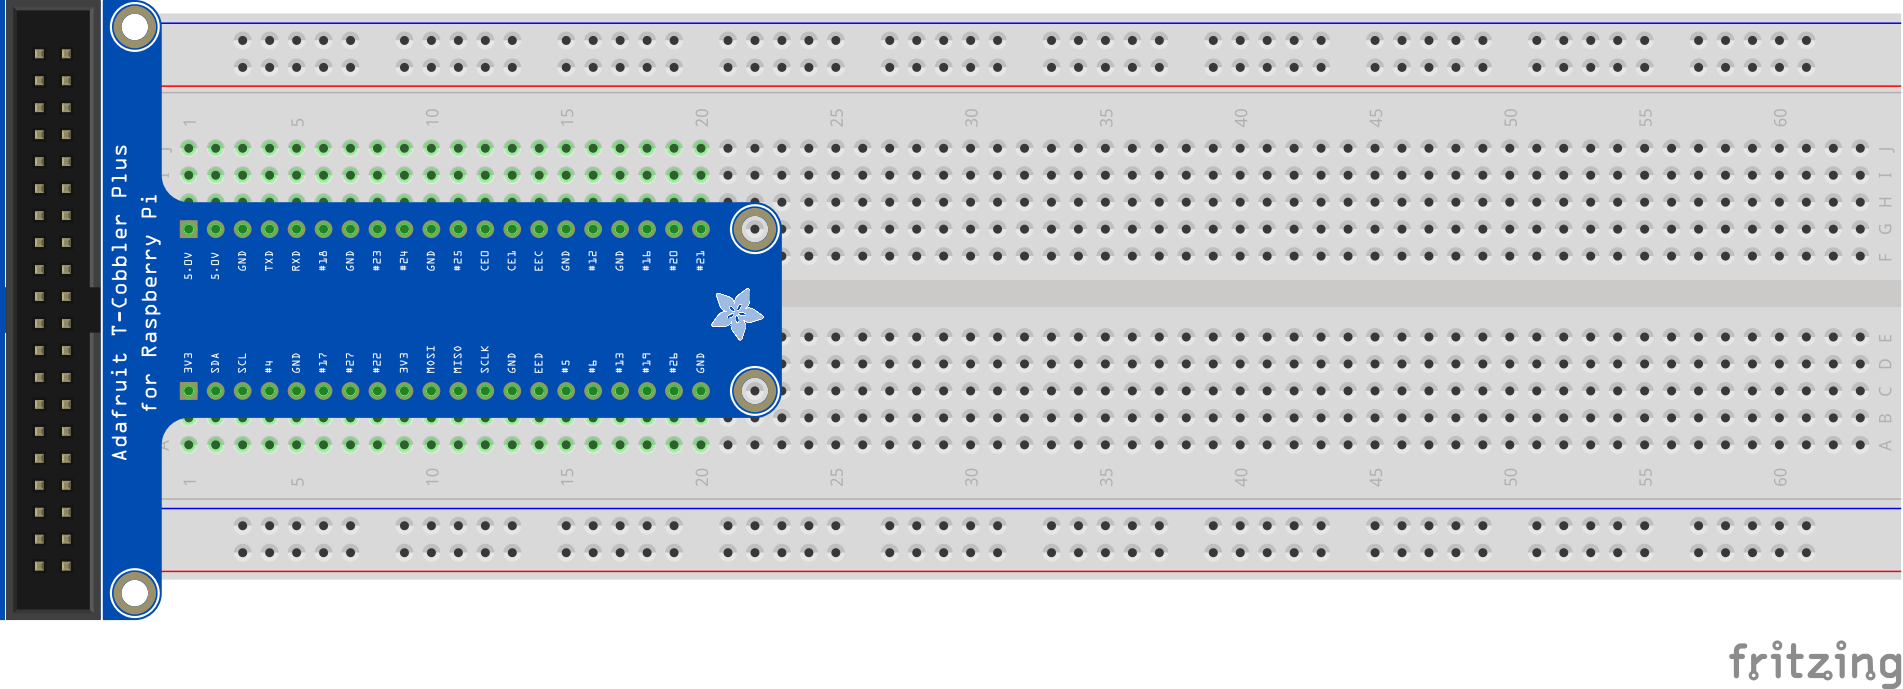
</center>

A breadboard is a construction base used to build and test circuits without soldering. It has a grid of holes where components and wires can be easily inserted and removed. We will be using the breadboard for circuit building. The T-shaped blue object, called the T-cobbler, connects the Raspberry Pi's GPIO pins to the breadboard, spreading them out and labeling them for easier identification.

<center>
    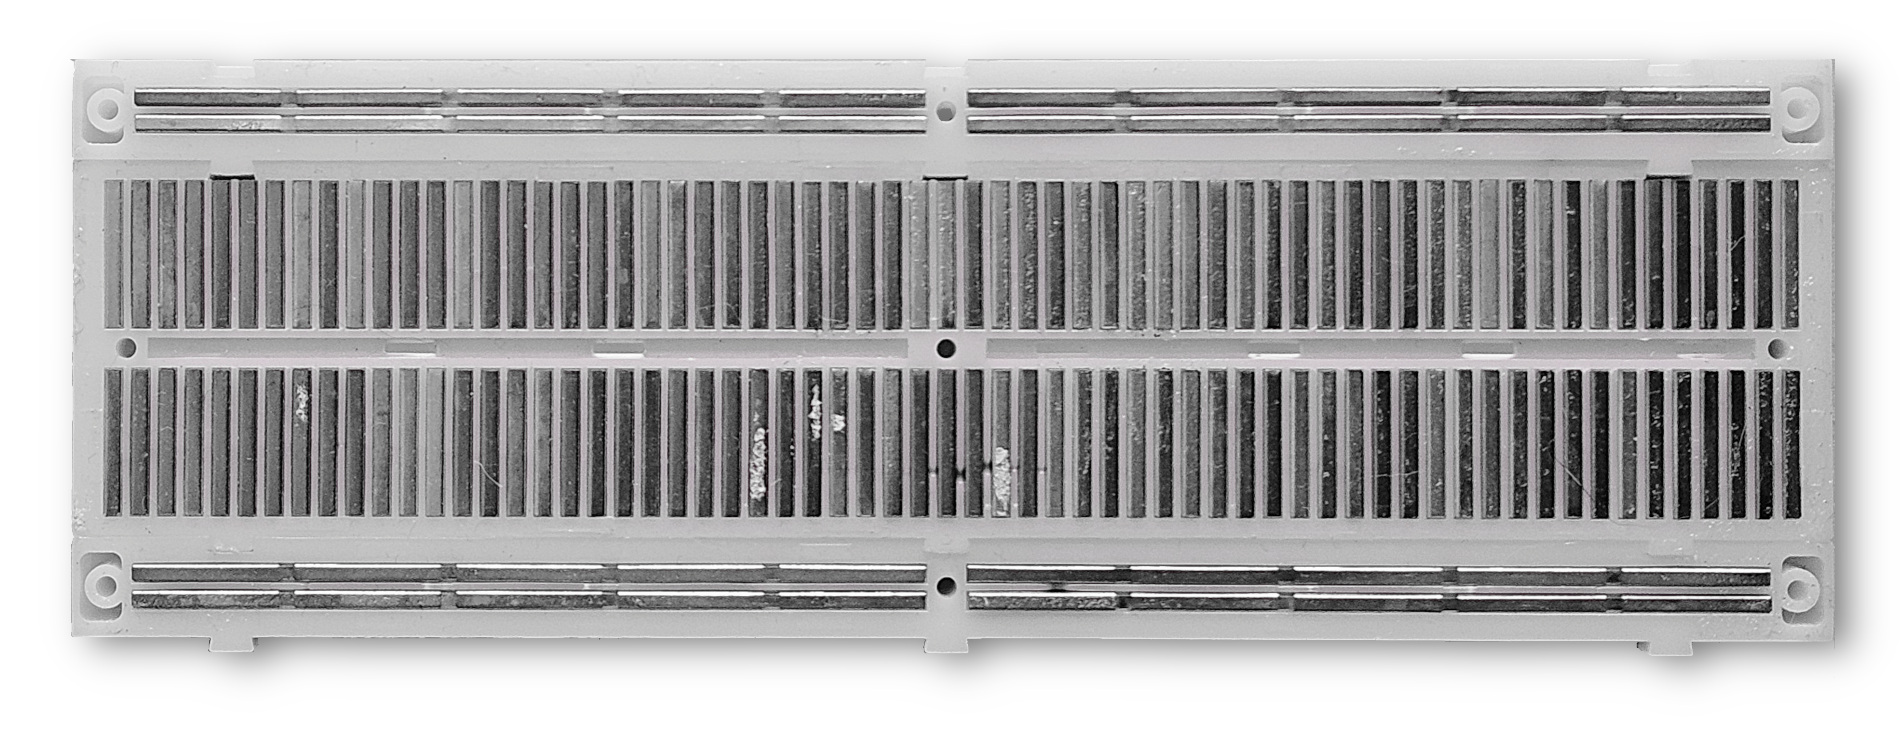
</center>

Beneath the breadboard are metal strips that connect the holes. The rows marked by the red and blue lines run horizontally across the top and bottom of the board, typically used for power and ground connections. In the center section, the columns run vertically but are separated in the middle,

Take time to familiarize yourself with the breadboard layout, as it will assist you in completing the lab exercises.

## Using the GPIO Pins From Python

The examples below use the **GPIO Zero** Python package.

To use the GPIO interface from Python the first step is to import the GPIO Zero library.

```python
import gpiozero
```

This line imports the entire GPIO Zero library; however, it is unnecessary to import classes that we will not be using. It is more efficient to specify a class that we want. 
For example, importing the LED class from GPIO Zero can be as simple as this:

```python
from gpiozero import LED
```

Note that GPIO Zero uses Broadcom (BCM) pin numbering by default. As a result, the pin numbers indicated on the cobbler correspond directly to the pin numbers used in the code. For example, to control an LED connected to pin `#18` as labeled on the cobbler, you would initialize it as follows:
```python
led = LED(18)
```

By default, when a GPIO Zero program terminates, all devices connected to the pins are automatically shut down. However, in the case of Jupyter Notebook, which is a continuously running environment, it is recommended to manually shut down the device with this line. *(Alternatively, we can restart the kernel to shut down all devices.)*

```python
led.close()
```

A more detailed example of how to use the GPIO pins will be provided in the section below.

## Example 1: Controlling an LED

A light-emitting diode (LED) is a two-lead semiconductor that emits light.  It resembles a simple p-n junction diode, which emits light when activated
<center>
    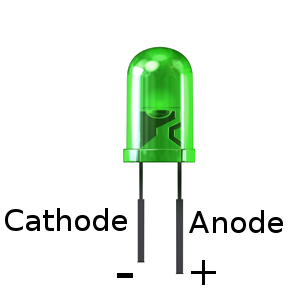
</center>

As LEDs are diodes, current only flows in one direction.  Thus you must connect the anode to the power source and the cathode to the ground.  Reversing these connections will not permit current to flow through and thus it will not emit light.

In general **the longest leg of the LED is the anode (+), while the shortest is the cathode (−).**

To control an LED from the Pi we are going to connect it to a GPIO pin.  While any GPIO pin may be used, this example uses the GPIO18.

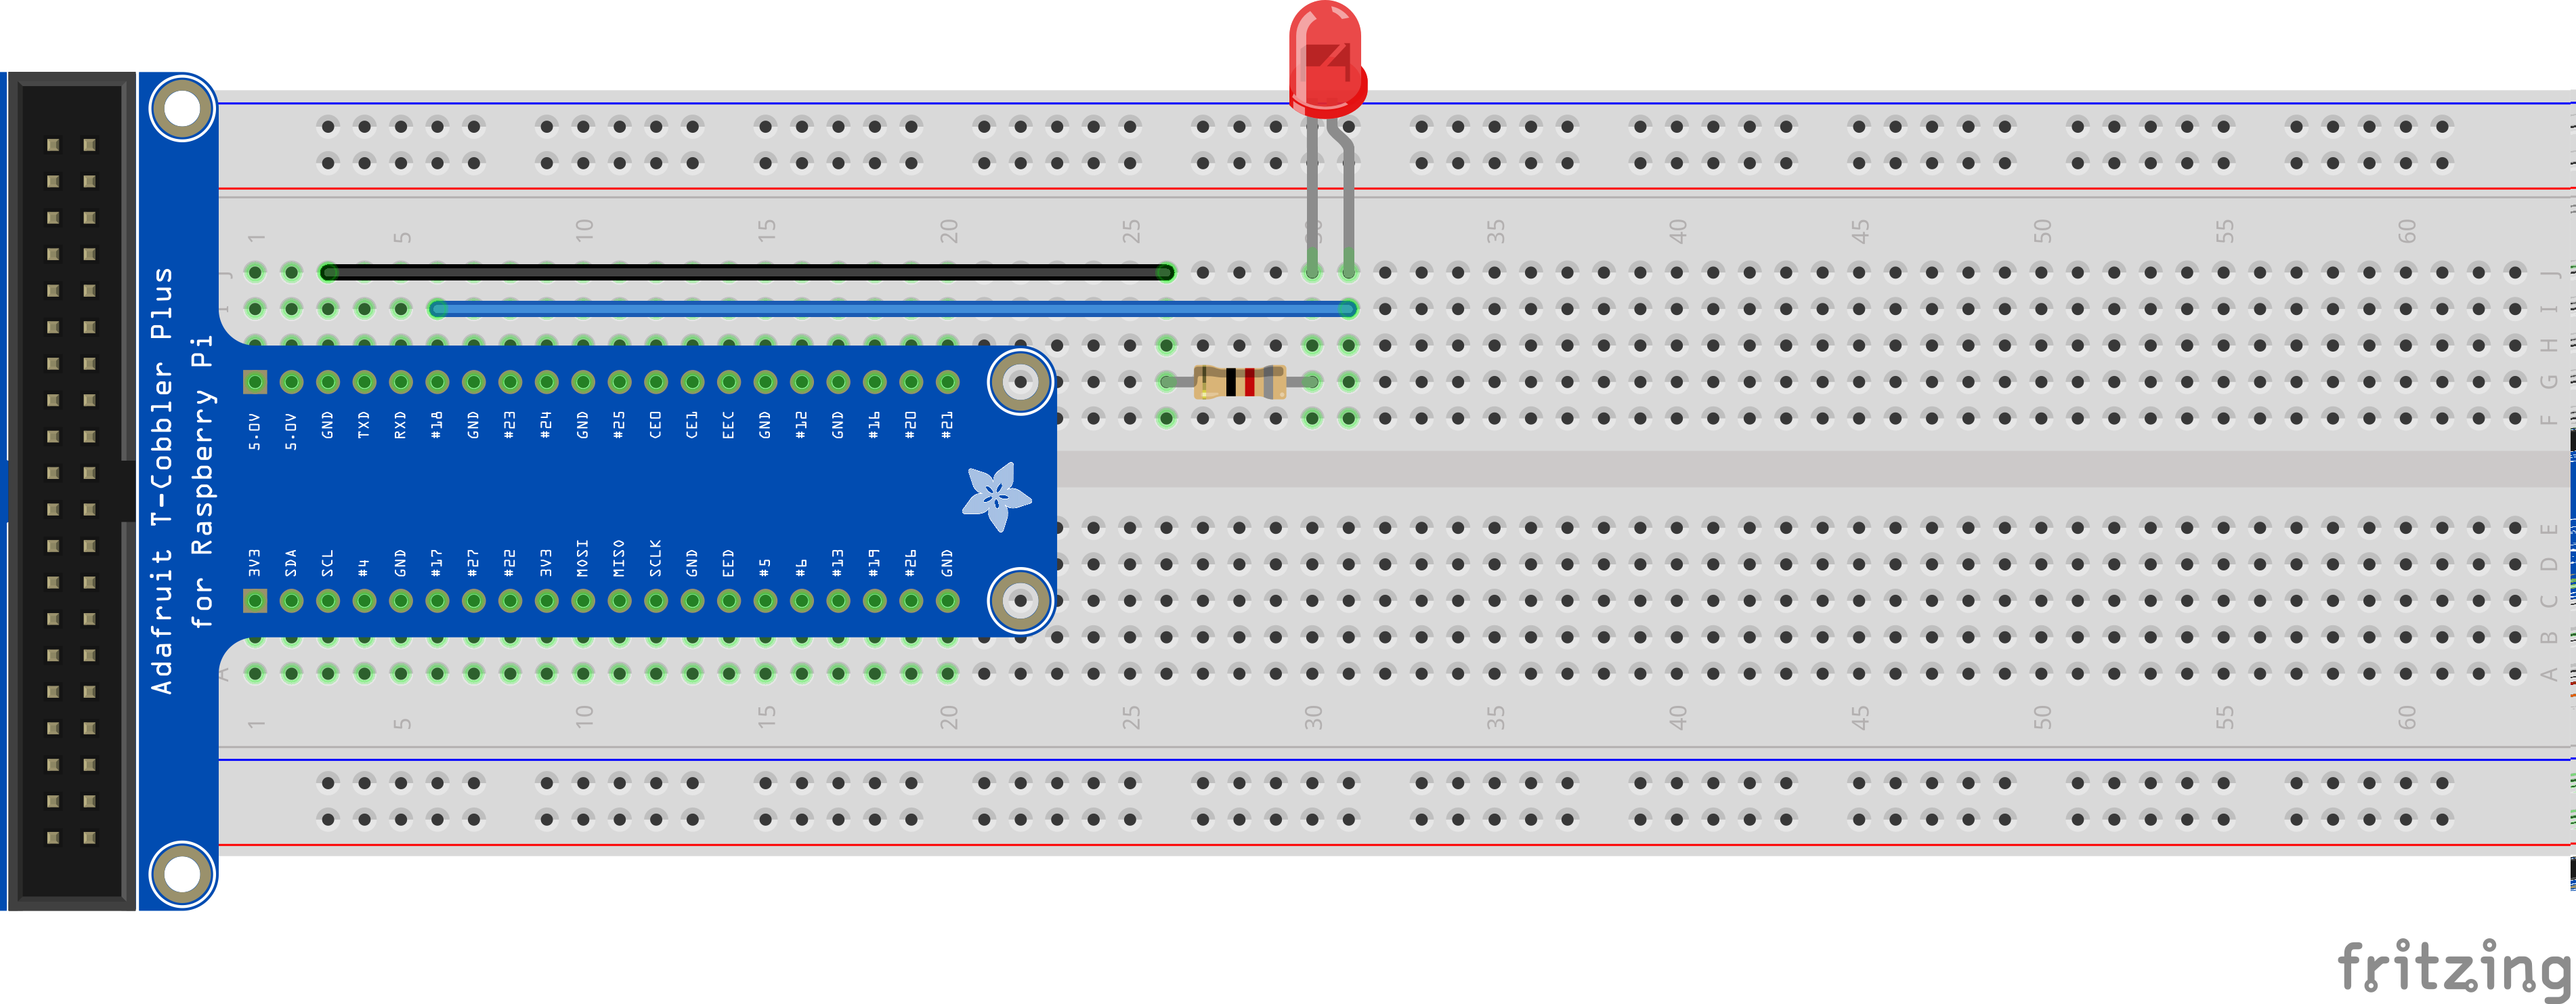

<div class="alert alert-block alert-info">
    <b>Note</b>: Wire colours are just for guidance and do not affect functionality.
</div>

As the output voltage of the GPIO pins is +3.3V and the LED only uses +2.1V, we must add a resistor.  The specification of this LED says it consumes 20mA.  Each pin supplies up to 16mA, so the actual forward current consumed by the LED is 16mA, not 20mA.

To calculate the appropriate resistor value we must use Ohm's law as follows.

$$
  R = \frac{V}{I} = \frac{3.3\text{V} - 2.1\text{V}}{16\text{mA}} = \frac{1.2\text{V}}{0.016\text{A}} = 75\Omega
$$

As the formula indicates, we need a resistor value of at least 75&#8486;, so a resistor value of 82&#8486; is suitable.

With the circuit constructed, we may now control the LED with the Raspberry Pi.

The following code initializes the GPIO18 as an LED, turns the LED on, sleeps for 3 seconds, then finally turns the LED off.

In [ ]:
# Import all the necessary libraries
from gpiozero import LED
from time import sleep

# Assign pin 18 as LED
led = LED(18)

# Turn the LED for 3 seconds then turn off
led.on()
sleep(3)
led.off()

# Shut down pin 18
led.close()

Alternatively, the LED class has a `value` property that can be assigned a `1` (on) or a `0` (off).

In [ ]:
led = LED(18)

led.value = 1
sleep(3)
led.value = 0

led.close()

## Example 2:  Button Input

### Simple button input with the Raspberry Pi.

In the previous example we demonstrated the usage of a GPIO pin as an output.  In order to demonstrate using a GPIO pin for input, we are going to extend the previous example to make the LED blink when a button is pressed.

Start with the circuit from Example 1. Insert a momentary push button switch into the breadboard.  Connect one terminal to GPIO17 and another to +3.3V.

Your circuit should be similar to the following.

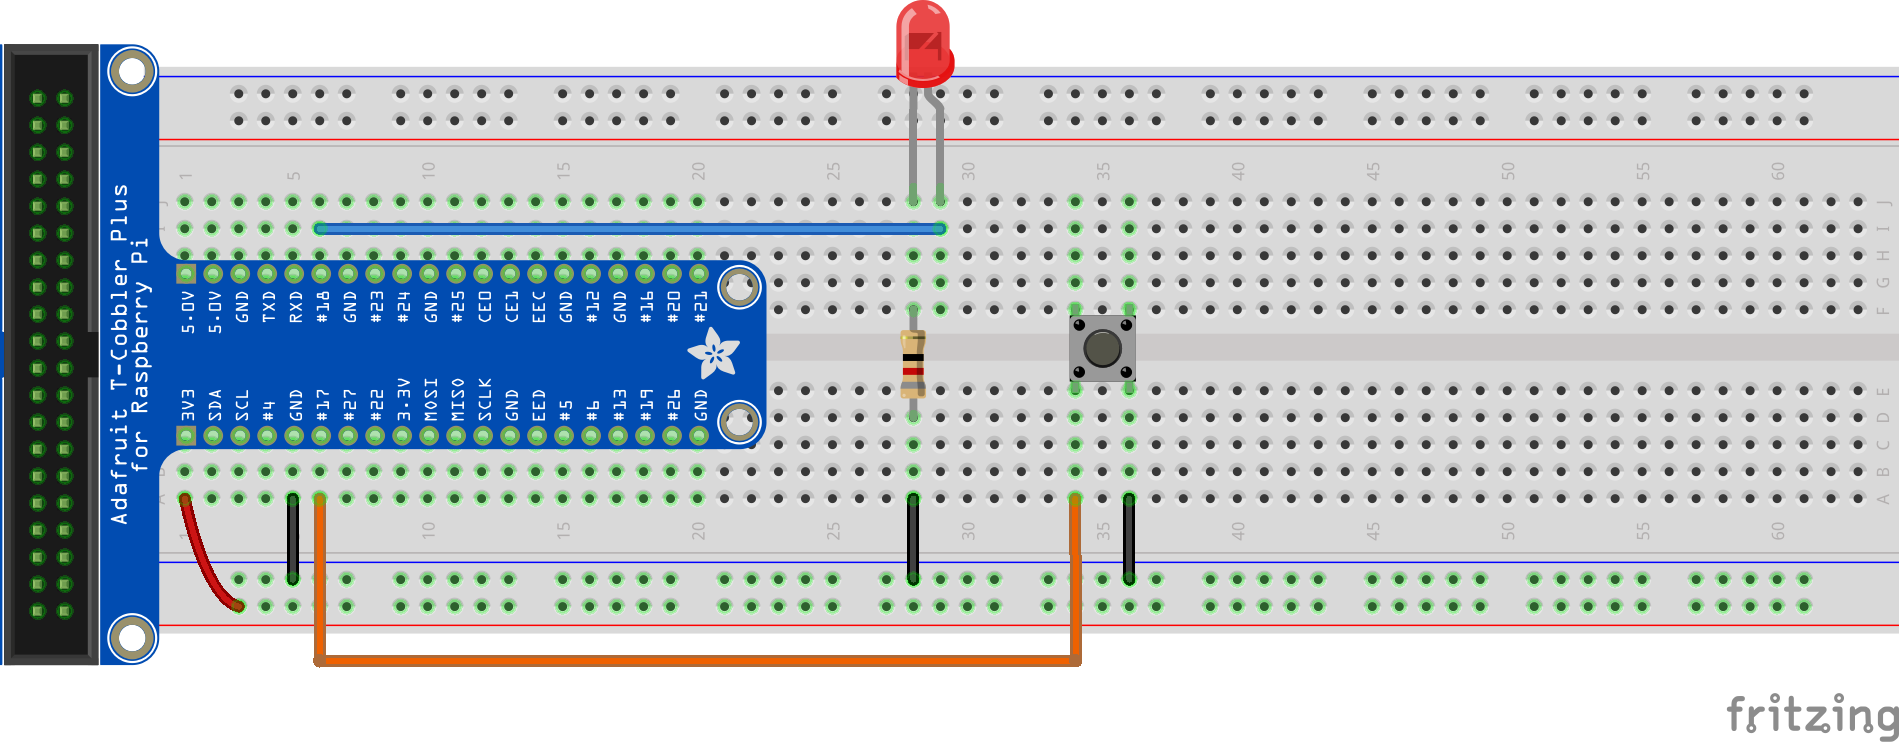

When the button is pressed, it completes the circuit between the GPIO17 and the ground pin.
<center>
    <figure>
        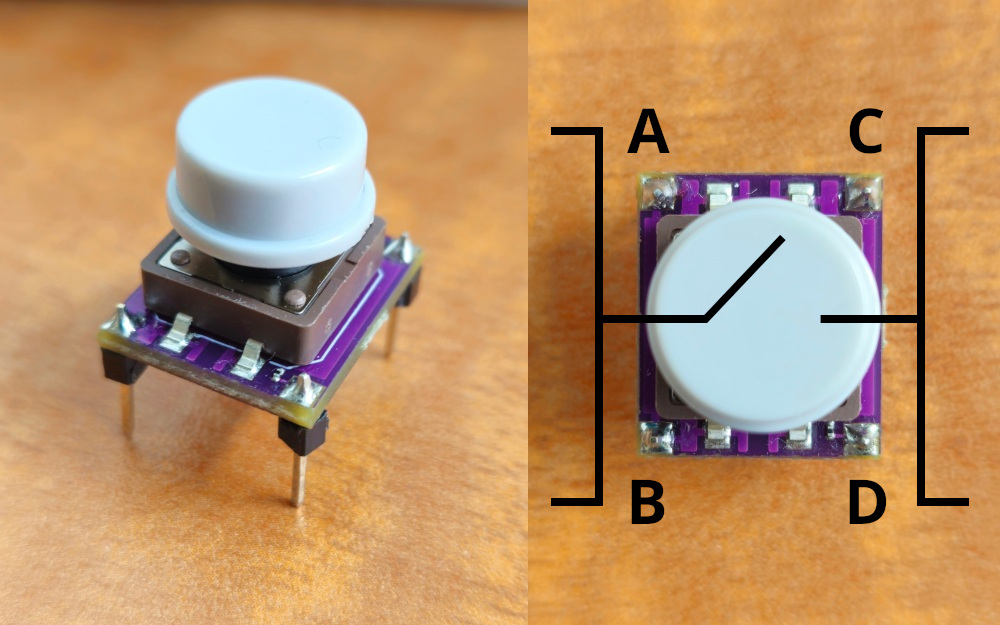
        <figcaption><i><b>Note:</b> the button in your kit looks like this. Pin A & B are connected and pin C & D are connected.</i>
    </figure>
</center>
The following Python program turns on the LED when the button is pressed. The LED is turned off otherwise.

In [ ]:
# Import all the necessary libraries
from gpiozero import LED, Button

# Assign pin 18 as LED and 17 as Button
led = LED(18)
button = Button(17)

try:
    while True:
        if button.is_pressed:
            led.on()
        else:
            led.off()
except KeyboardInterrupt:
    led.close()
    button.close()

<div class="alert alert-block alert-info">
    <b>Note:</b> There is a shortcut to interrupt the kernel by pressing <code>i</code> twice
</div>

Alternatively, the Button class provides `when_pressed` and `when_released` functions, which allow you to assign a specific function to be executed when the button is pressed or released.\
**However, keep in mind that parameters cannot be passed to these functions.**

In [ ]:
from gpiozero import LED, Button
from signal import pause

led = LED(18)
button = Button(17)

try:
    button.when_pressed = led.on
    button.when_released = led.off
    pause()
except KeyboardInterrupt:
    led.close()
    button.close()

## Exercise

Extend the first program to make the LED blink constantly

In [ ]:
# Your code here